# Interpolasi Chevbyshev

Interpolasi Chebyshev melibatkan penggunaan **Chebyshev nodes** dan polynomial untuk membangun interpolasi polynomial. Interpolasi ini dapat meminimalkan Runge's phenomenon.

## Chebyshev nodes
Idenya adalah mendistribusikan error secara seragam. Chebyshev nodes dapat dipilih di dalam interval $[a,b]$ dengan

$$\bar{x}_i = \frac{1}{2} (a + b) + \frac{1}{2} (b - a) \cos \left( \frac{2i + 1}{2n + 2} \pi \right), \hspace{1em} i=0,1, \cdots, n$$



In [1]:
using Polynomials
using Plots

In [2]:
function chebyshev_nodes(n, a, b)
    return [(a + b) / 2 + (b - a) / 2 * cos(π * (2*i + 1) / (2 * n + 2) * π) for i in 1:n]
end

chebyshev_nodes (generic function with 1 method)

In [3]:
function poly_Lagrange(f, nodes, x)
    n = length(nodes)
    return sum(f(nodes[i])* prod([(x - nodes[j]) / (nodes[i] - nodes[j]) for j in 1:n if j ≠ i]) for i in 1:n)
end

poly_Lagrange (generic function with 1 method)

In [4]:
runge(z) = 1 / (1 + 25z^2)

runge (generic function with 1 method)

In [5]:
N = 30
x = range(-1, 1, length=N+1)
y = runge.(x);

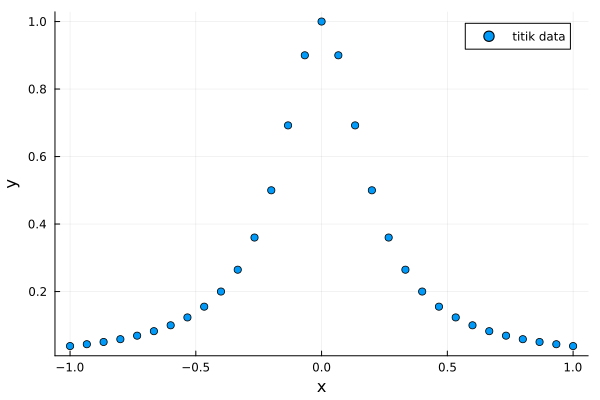

In [6]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

## Pengujian

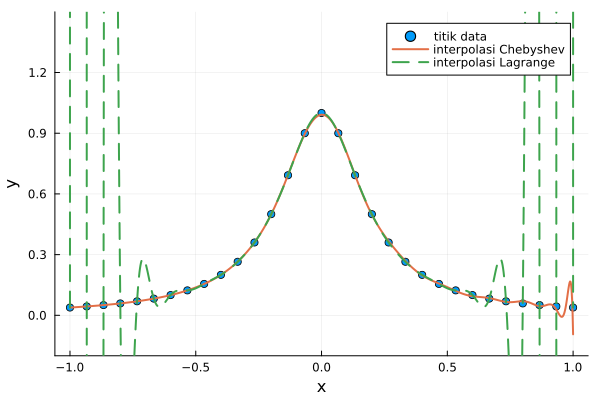

In [7]:
xx = range(-1, 1, length=1000)
nodes = chebyshev_nodes(N, -1, 1)

yy = [poly_Lagrange(runge, nodes, xx[i]) for i in 1:length(xx)]
yL = [poly_Lagrange(runge, x, xx[i]) for i in 1:length(xx)]
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)

plot!(xx, yy, label="interpolasi Chebyshev", linewidth=2, ylimits=(-0.2,1.5))
plot!(xx, yL, label="interpolasi Lagrange", linewidth=2, ylimits=(-0.2,1.5), linestyle=:dash)